# Stroke Prediction on real world dataset


## Opening Statement:

In this project, We explore a real-world dataset to predict the likelihood of an individualover 50 having a stroke. Using various machine learning models, oversampling techniques, and thorough exploratory data analysis (EDA), we aimed to develop accurate predictive models while addressing class imbalances.

## Summary:

This notebook focuses on predicting strokes based on a diverse set of features by using  logistic regression, support vector machines (SVM), and random forest classifiers to build robust models. Addressing the challenge of imbalanced classes, I utilized oversampling techniques, particularly Synthetic Minority Over-sampling Technique (SMOTE). The project also includes a detailed exploratory data analysis (EDA) to uncover insights from the dataset, enhancing the interpretability of the models.

The code is organized in Jupyter Notebooks, and the complete project, including EDA, model development, and evaluations. Let's dive into the world of data science and stroke prediction!


## loading dataset 

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
import pandas as pd

df = pd.read_excel('healthcare-dataset-stroke-data.xlsx')


df.head()



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## observing data

In [103]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## data cleaning

In [105]:
df.duplicated().sum()

0

In [106]:
df.duplicated().sum()

0

In [107]:
df.isna().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [108]:
df["gender"] = df["gender"].replace(["Male", "Female"], [1, 0])
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [109]:
df["ever_married"] = df["ever_married"].replace(["Yes", "No"], [1, 0])
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [110]:
dummies = pd.get_dummies(df, columns = ["work_type", "Residence_type", "smoking_status"])
df2 = dummies
df2.head()


,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,1,0,0
1,51676,0,61.0,0,0,1,202.21,NaN,1,0,0,0,1,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0,0,1,0,0,0,1,0
3,60182,0,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,0,1,0,0,0,1
4,1665,0,79.0,1,0,1,174.12,24.0,1,0,0,0,1,0,1,0,0,0,1,0


In [111]:
df2.drop(["id"], axis = 1, inplace = True)
df2.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,1,0,0
1,0,61.0,0,0,1,202.21,NaN,1,0,0,0,1,0,1,0,0,0,1,0
2,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,0,1,0,0,0,1
4,0,79.0,1,0,1,174.12,24.0,1,0,0,0,1,0,1,0,0,0,1,0


In [112]:
df2.dropna(axis = 0, inplace = True)
df2.isna().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [113]:
df2.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,1,0,0
2,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,0,1,0,0,0,1
4,0,79.0,1,0,1,174.12,24.0,1,0,0,0,1,0,1,0,0,0,1,0
5,1,81.0,0,0,1,186.21,29.0,1,0,0,1,0,0,0,1,0,1,0,0


In [114]:
df2.corr()

C:\Users\faiza\AppData\Local\Temp\ipykernel_24052\1778878097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.274425,0.257123,0.680782,0.235838,0.333398,0.232331,0.133593,-0.079384,0.120021,0.327347,-0.634937,-0.010948,0.010948,-0.389577,0.242404,0.124377,0.076801
hypertension,0.274425,1.000000,0.115991,0.162406,0.180543,0.167811,0.142515,0.019232,-0.021341,-0.004637,0.111794,-0.126561,0.001074,-0.001074,-0.143219,0.062078,0.066717,0.028214
heart_disease,0.257123,0.115991,1.000000,0.111245,0.154525,0.041357,0.137938,0.005095,-0.015312,-0.000279,0.081484,-0.088072,0.002362,-0.002362,-0.074468,0.071339,-0.020685,0.048686
ever_married,0.680782,0.162406,0.111245,1.000000,0.151377,0.341695,0.105089,0.137915,-0.091976,0.156818,0.191469,-0.545462,-0.004989,0.004989,-0.338169,0.176007,0.105253,0.106574
avg_glucose_level,0.235838,0.180543,0.154525,0.151377,1.000000,0.175502,0.138936,0.017723,-0.013991,0.009273,0.069051,-0.101182,0.007617,-0.007617,-0.103225,0.074250,0.032085,0.010981
bmi,0.333398,0.167811,0.041357,0.341695,0.175502,1.000000,0.042374,0.079584,-0.028602,0.208029,0.072701,-0.448674,0.000122,-0.000122,-0.270340,0.107031,0.107964,0.088324
stroke,0.232331,0.142515,0.137938,0.105089,0.138936,0.042374,1.000000,0.003553,-0.014149,0.014934,0.055356,-0.080971,-0.006031,0.006031,-0.075016,0.057320,0.010723,0.021530
work_type_Govt_job,0.133593,0.019232,0.005095,0.137915,0.017723,0.079584,0.003553,1.000000,-0.025745,-0.444147,-0.166136,-0.152679,-0.010287,0.010287,-0.098583,0.030095,0.046898,0.031402
work_type_Never_worked,-0.079384,-0.021341,-0.015312,-0.091976,-0.013991,-0.028602,-0.014149,-0.025745,1.000000,-0.077664,-0.029051,-0.026698,-0.023430,0.023430,0.008992,-0.030419,0.035866,-0.028200
work_type_Private,0.120021,-0.004637,-0.000279,0.156818,0.009273,0.208029,0.014934,-0.444147,-0.077664,1.000000,-0.501179,-0.460584,0.017155,-0.017155,-0.214513,0.024872,0.110871,0.099115


## creating a data frame with age over 50


### as you can see below that average age at which a person gets stoke is over 50, you will se below that we for this dataset we only used for people over the age of 50

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

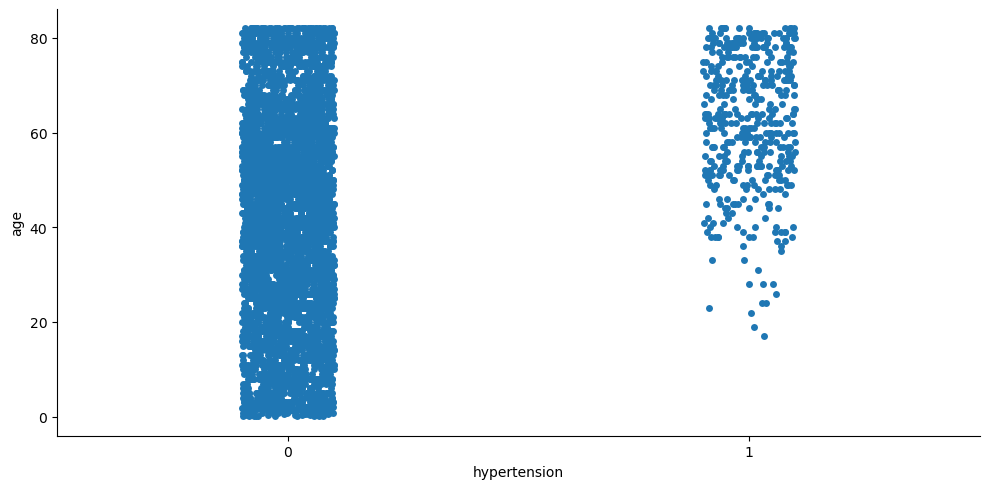

In [116]:
sns.catplot(y="age", x="hypertension", data=df2, aspect=2)


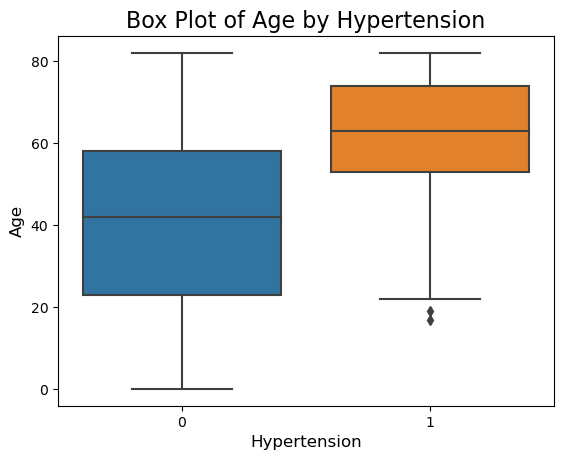

In [117]:
sns.boxplot(x='hypertension', y='age', data=df2)
plt.xlabel('Hypertension', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Box Plot of Age by Hypertension', fontsize=16)
plt.show()


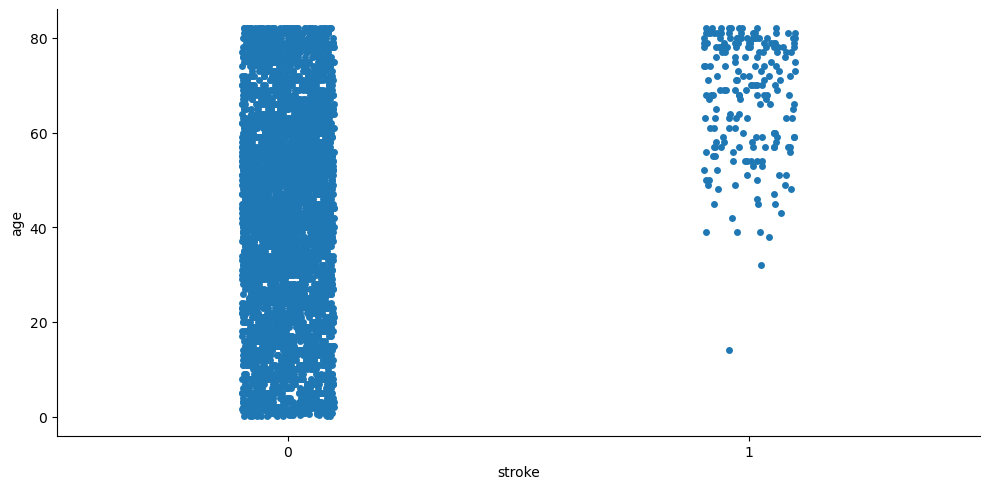

In [161]:
sns.catplot(y="age", x="stroke", data=df2, aspect=2)

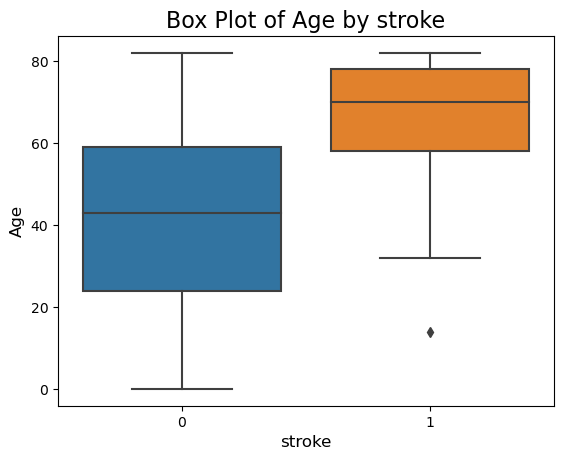

In [160]:
sns.boxplot(x='stroke', y='age', data=df2)
plt.xlabel('stroke', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Box Plot of Age by stroke', fontsize=16)
plt.show()

In [118]:
correlation = df2['age'].corr(df2['hypertension'])

print(f"Correlation between column1 and column2: {correlation}")


Correlation between column1 and column2: 0.27442487302802127


In [119]:
df3 = df2[df2['age'] >= 50]
df3.head()


,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,1,0,0
2,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0,0,1,0,0,0,1,0
4,0,79.0,1,0,1,174.12,24.0,1,0,0,0,1,0,1,0,0,0,1,0
5,1,81.0,0,0,1,186.21,29.0,1,0,0,1,0,0,0,1,0,1,0,0
6,1,74.0,1,1,1,70.09,27.4,1,0,0,1,0,0,1,0,0,0,1,0


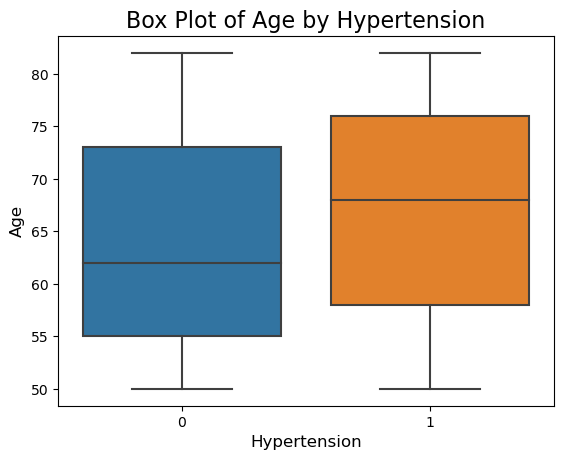

In [120]:
sns.boxplot(x='hypertension', y='age', data=df3)
plt.xlabel('Hypertension', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Box Plot of Age by Hypertension', fontsize=16)
plt.show()

In [121]:
correlation = df3['age'].corr(df2['hypertension'])

print(f"Correlation between column1 and column2: {correlation}")

Correlation between column1 and column2: 0.10967657281154519


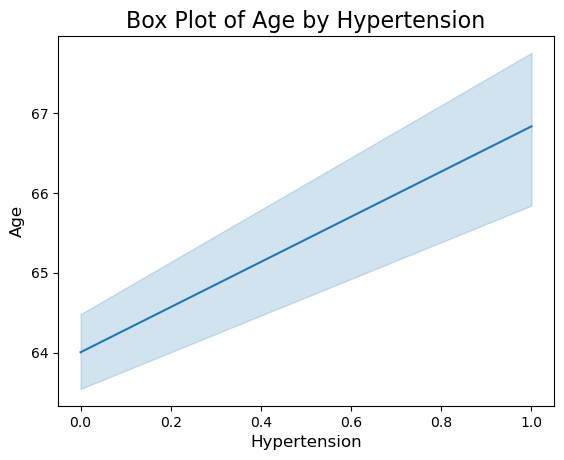

In [122]:
sns.lineplot(x='hypertension', y='age', data=df3)
plt.xlabel('Hypertension', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Box Plot of Age by Hypertension', fontsize=16)
plt.show()

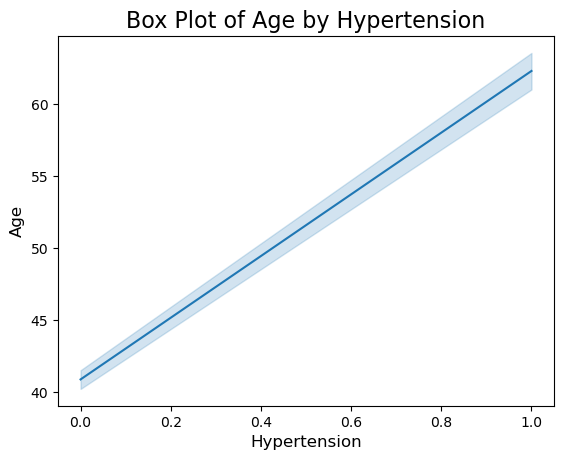

In [123]:
sns.lineplot(x='hypertension', y='age', data=df2)
plt.xlabel('Hypertension', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Box Plot of Age by Hypertension', fontsize=16)
plt.show()

In [124]:
max_age_with_stroke = df2[df2['stroke'] == 1]['age'].max()
print(f"The maximum age at which a person had a stroke is: {max_age_with_stroke}")

The maximum age at which a person had a stroke is: 82.0


In [125]:
min_age_with_stroke = df2[df2['stroke'] == 1]['age'].min()
min_age_with_stroke

14.0

In [126]:
meanageofstroke = df2[df2['stroke'] == 1]['age'].mean()
meanageofstroke

67.71291866028709

## EDA (exploratory data analysis)

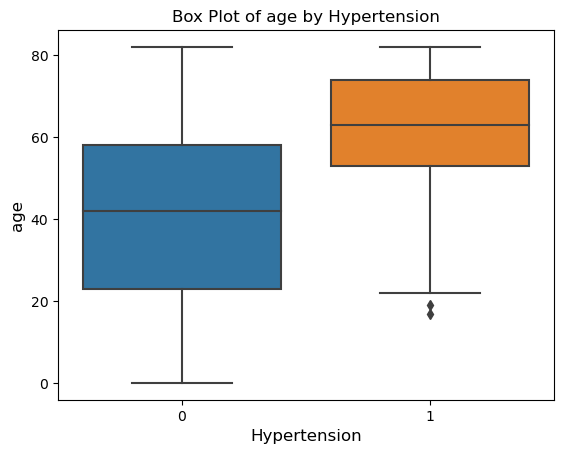

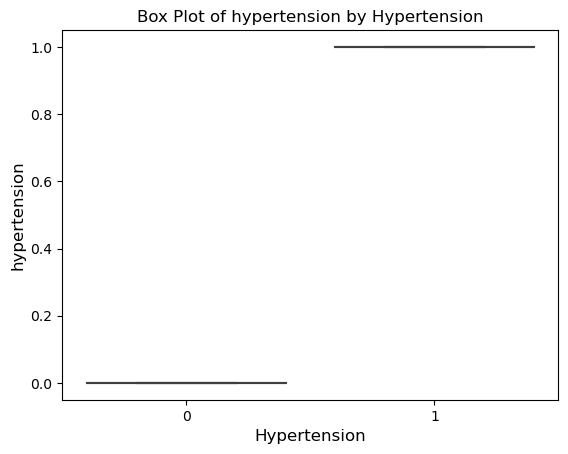

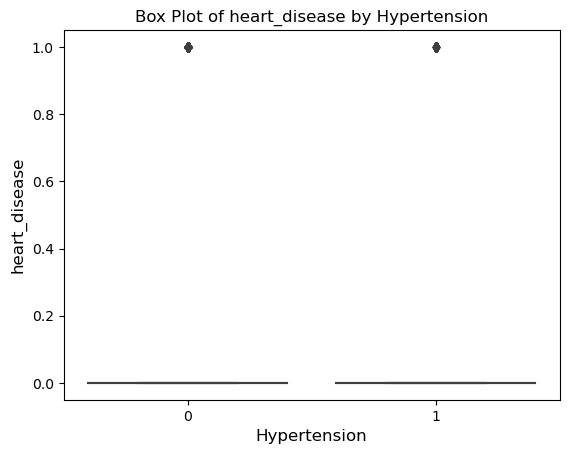

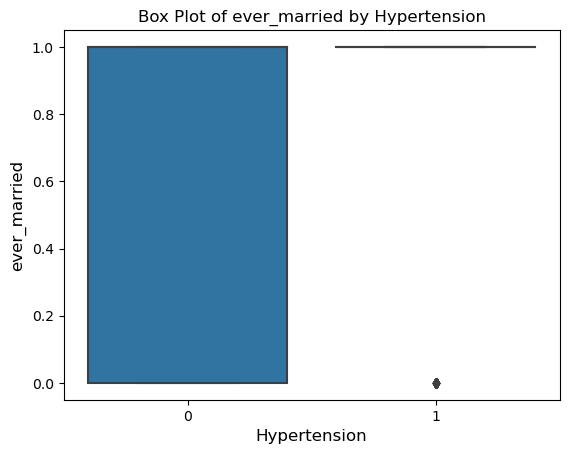

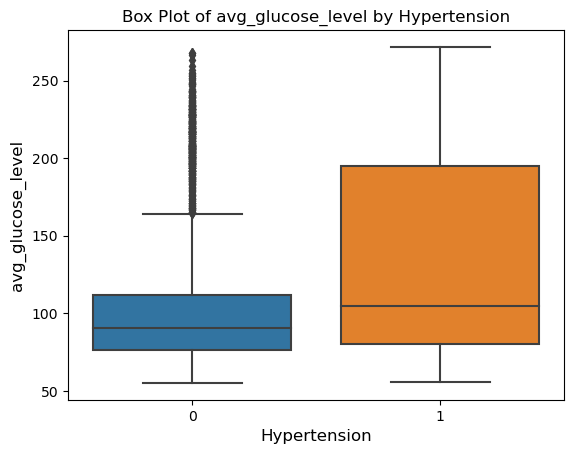

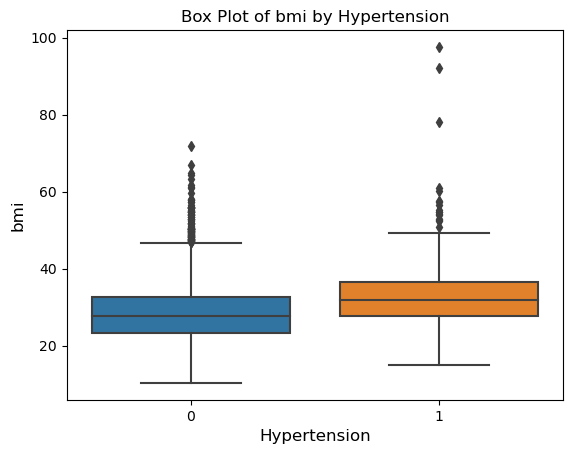

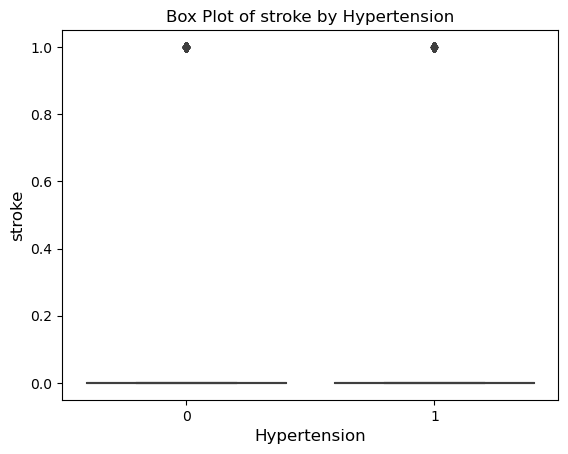

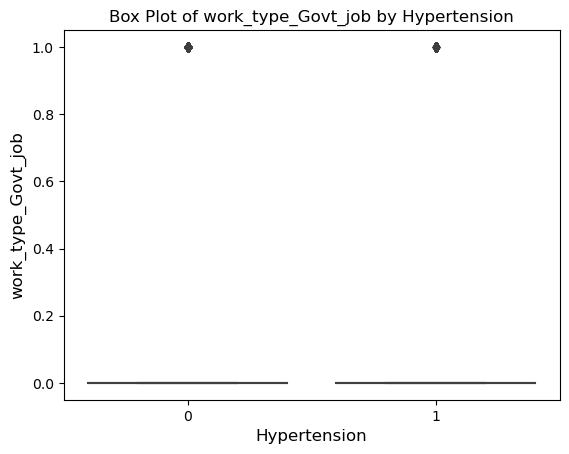

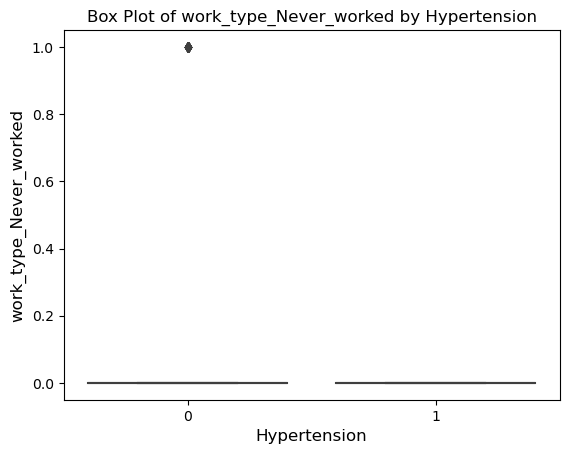

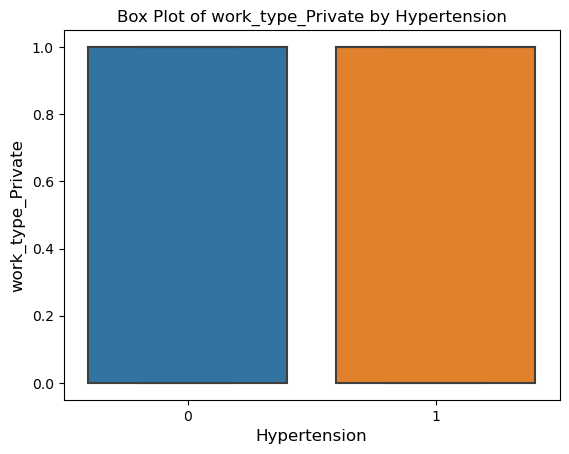

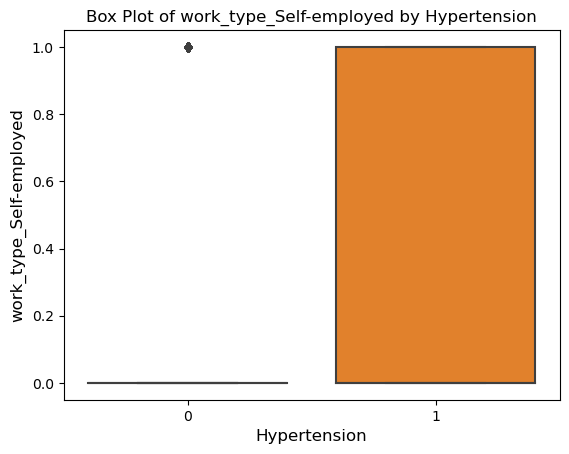

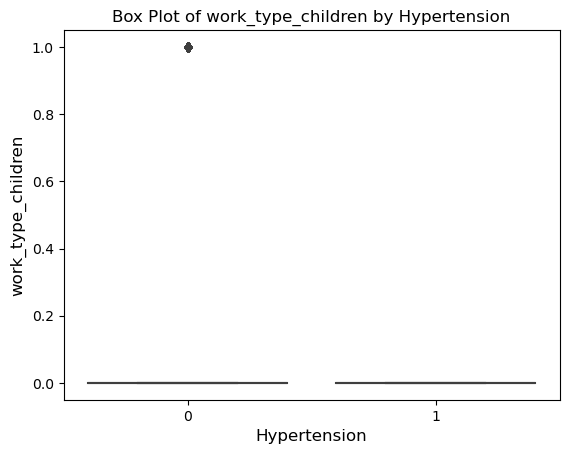

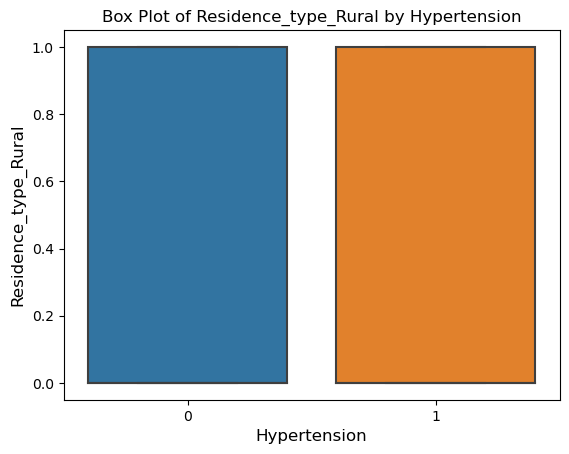

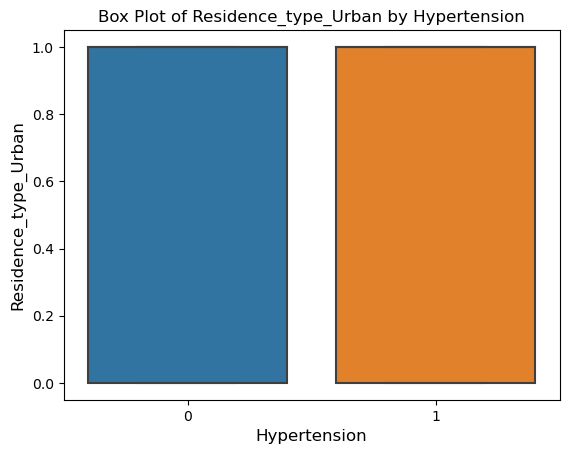

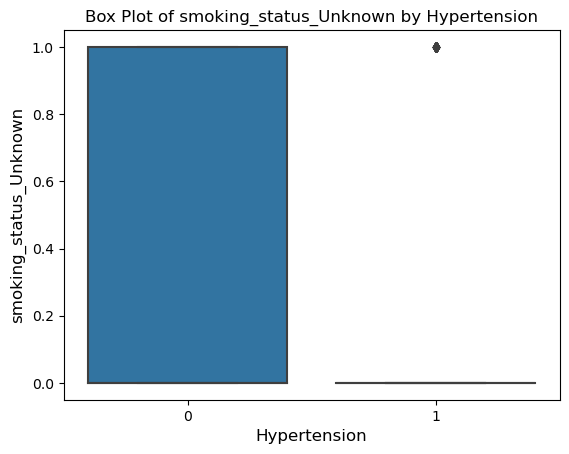

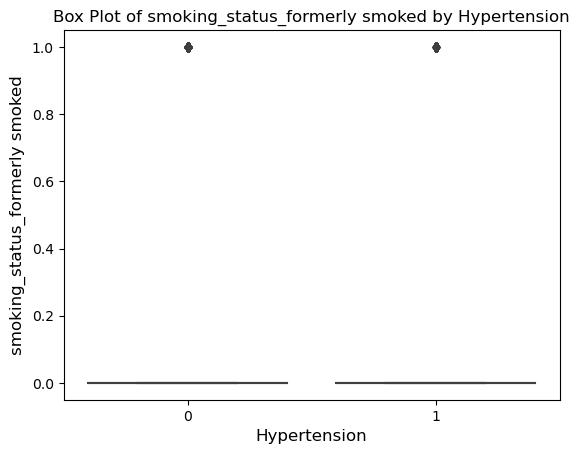

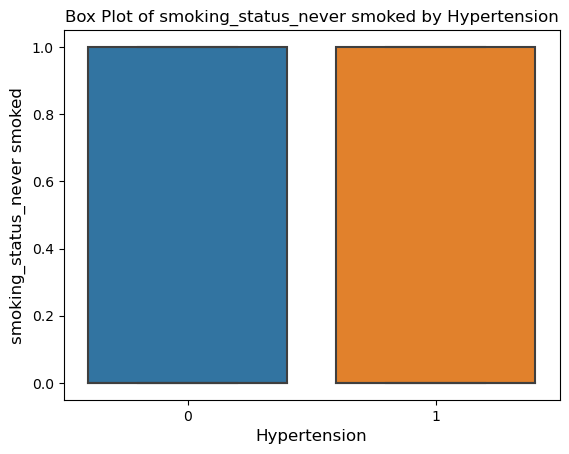

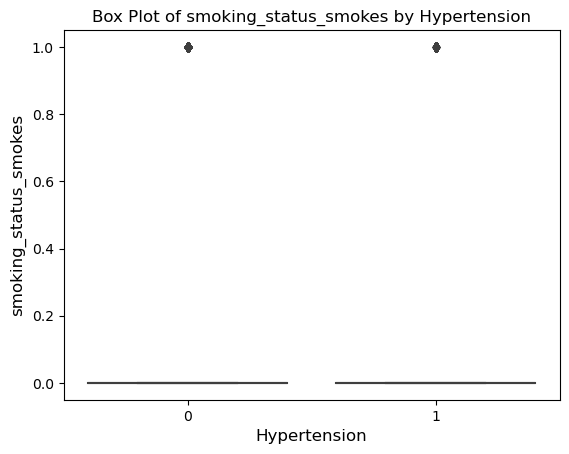

In [127]:
numeric_columns = df2.select_dtypes(include=['number']).columns.tolist()


for column in numeric_columns:
    sns.boxplot(x='hypertension', y=column, data=df2)
    plt.xlabel('Hypertension', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'Box Plot of {column} by Hypertension', fontsize=12)
    plt.show()

In [137]:

correlation_with_stroke = df3.corr()['stroke'].sort_values(ascending=False)

print(correlation_with_stroke)


stroke                            1.000000
age                               0.179947
avg_glucose_level                 0.121049
hypertension                      0.107013
heart_disease                     0.100033
work_type_Private                 0.021852
smoking_status_smokes             0.016622
smoking_status_formerly smoked    0.014444
smoking_status_never smoked       0.002965
Residence_type_Urban              0.002216
Residence_type_Rural             -0.002216
work_type_Self-employed          -0.007795
bmi                              -0.018195
work_type_Govt_job               -0.019869
ever_married                     -0.026050
smoking_status_Unknown           -0.036146
work_type_Never_worked                 NaN
work_type_children                     NaN
Name: stroke, dtype: float64


C:\Users\faiza\AppData\Local\Temp\ipykernel_24052\2504651083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_stroke = df3.corr()['stroke'].sort_values(ascending=False)


C:\Users\faiza\AppData\Local\Temp\ipykernel_24052\4278135390.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df3.corr()


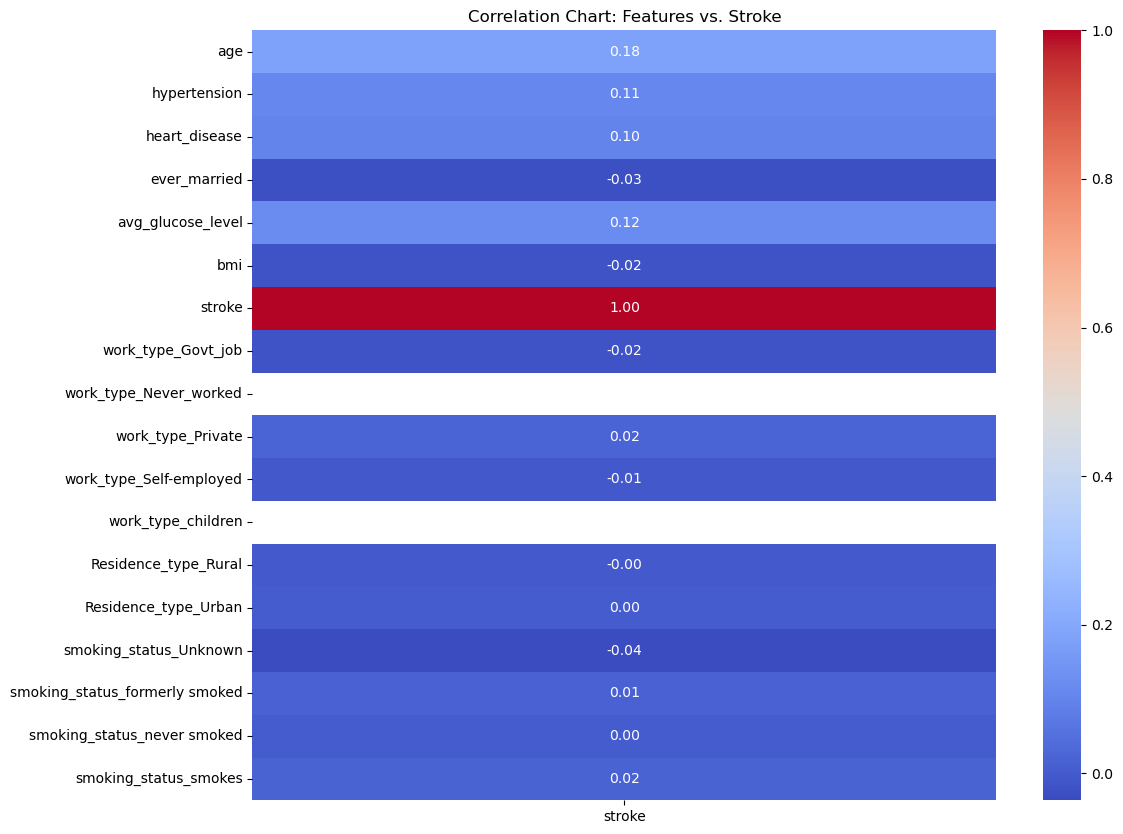

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df3.corr()


plt.figure(figsize=(12, 10))


sns.heatmap(correlation_matrix[['stroke']], annot=True, cmap='coolwarm', fmt=".2f")


plt.title("Correlation Chart: Features vs. Stroke")


plt.show()


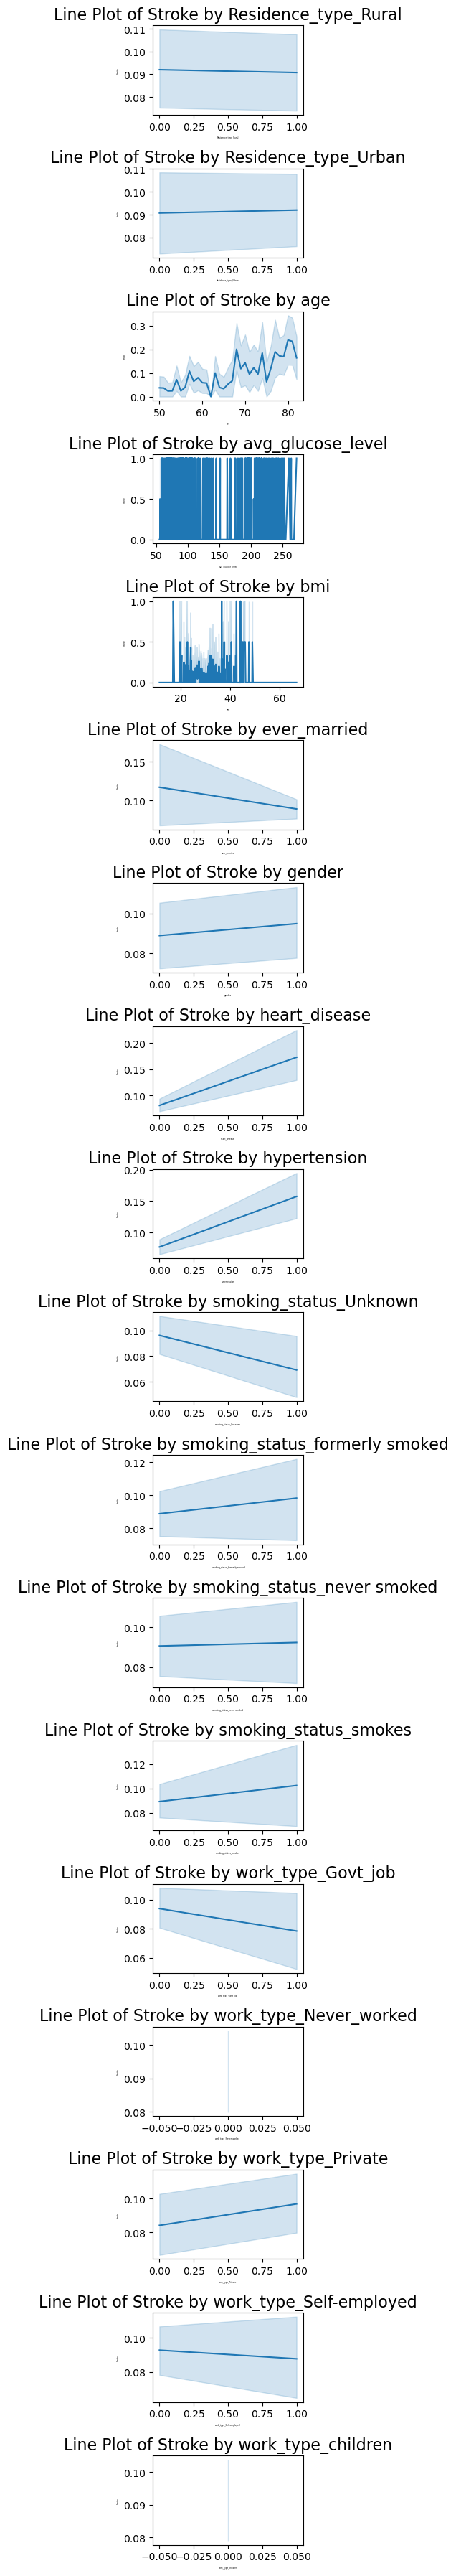

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns (excluding 'stroke' column)
columns_to_plot = df3.columns.difference(['stroke'])

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(3, 2 * len(columns_to_plot)))

# Create line plots for each column
for i, column in enumerate(columns_to_plot):
    sns.lineplot(x=column, y='stroke', data=df3, ax=axes[i])
    axes[i].set_xlabel(column, fontsize=2)
    axes[i].set_ylabel('Stroke', fontsize=2)
    axes[i].set_title(f'Line Plot of Stroke by {column}', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()


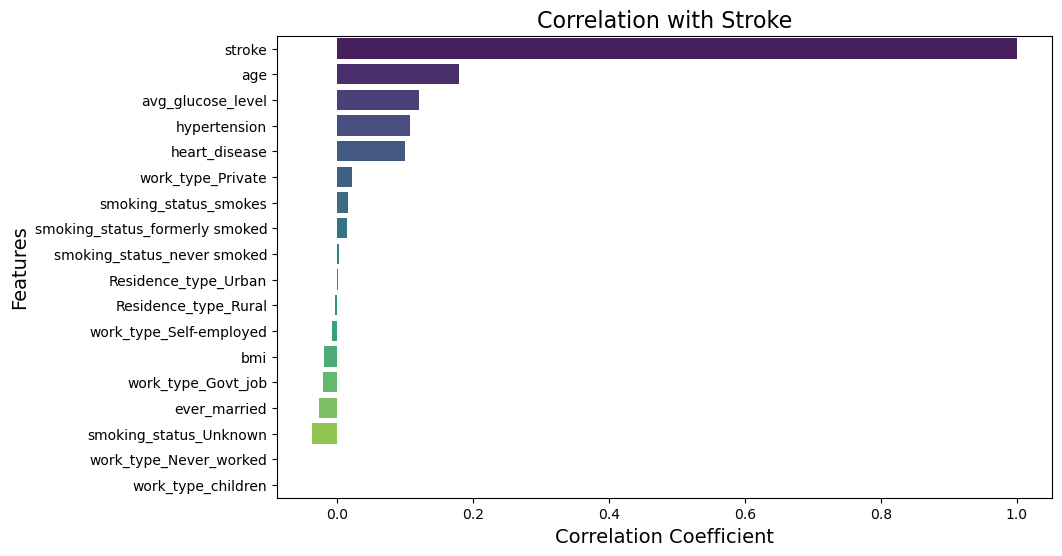

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_stroke.values, y=correlation_with_stroke.index, palette='viridis')
plt.title('Correlation with Stroke', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

## selecting model

In [139]:
from sklearn.model_selection import train_test_split

X = df3.drop("stroke", axis=1)
y = df3["stroke"]

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


In [140]:
from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit
import pandas as pd



def gridSearch(X, y):
    params = {
        "Logistic Regression": {
            "model": LogisticRegression(max_iter=1000),  # Adjust the value as needed
            "param": {}
        },
        "L1 Reg": {
            "model": Lasso(),
            "param": {"alpha": [1, 2]}
        },
        "L2 Reg": {
            "model": RidgeClassifier(),
            "param": {"alpha": [1, 2]}
        },
        "Decision Tree Classifier": {
            "model": DecisionTreeClassifier(),
            "param": {
                "criterion": ['gini', 'entropy'],
                "splitter": ["best", "random"]
            }
        },
        "Random Forest Classifier": {
            "model": RandomForestClassifier(),
            "param": {
                "n_estimators": [50, 100],
                "criterion": ['gini', 'entropy', 'log_loss'],
            }
        },
        "Supported Vector Machine Classification": {
            "model": SVC(),
            "param": {
                "degree": [1, 2, 3, 5],
                "gamma": ["scale", "auto"]
            }
        },
        "KNN Classification": {
            "model": KNeighborsClassifier(),
            "param": {
                "n_neighbors": [3, 5, 10, 15, 20],
                "weights": ["uniform", "distance"],
                "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
                "leaf_size": [5, 10, 30, 50, 100]
            }
        },
        "Gradient Boosting Classification": {
            "model": GradientBoostingClassifier(),
            "param": {
                "loss": ["deviance", "exponential"],
                "learning_rate": [0.1, 0.01, 0.001, 0.005],
                "n_estimators": [10, 100, 200, 500]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    for model_name, mp in params.items():
        gsc = RandomizedSearchCV(mp["model"], mp["param"], cv=cv, return_train_score=False).fit(X, y)
        scores.append({
            "model": model_name,
            "best_score": gsc.best_score_,
            "best_params": gsc.best_params_
        })
    return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])


X = df3.drop("stroke", axis=1)
y = df3.stroke


def display_scores(scores):
    for index, row in scores.iterrows():
        print(f"Model: {row['model']}")
        print(f"Best Score: {row['best_score']}")
        print(f"Best Parameters: {row['best_params']}")
        print("\n")

# Perform the grid search
scores = gridSearch(X, y)

# Display the scores
display_scores(scores)





C:\Users\faiza\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\faiza\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\faiza\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\faiza\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\faiza\anaconda3\lib\site-packages\sklearn\m

Model: Logistic Regression
Best Score: 0.9023923444976077
Best Parameters: {}


Model: L1 Reg
Best Score: 0.008634130424957887
Best Parameters: {'alpha': 1}


Model: L2 Reg
Best Score: 0.9023923444976077
Best Parameters: {'alpha': 1}


Model: Decision Tree Classifier
Best Score: 0.8339712918660288
Best Parameters: {'splitter': 'best', 'criterion': 'entropy'}


Model: Random Forest Classifier
Best Score: 0.9014354066985646
Best Parameters: {'n_estimators': 100, 'criterion': 'gini'}


Model: Supported Vector Machine Classification
Best Score: 0.9023923444976077
Best Parameters: {'gamma': 'scale', 'degree': 1}


Model: KNN Classification
Best Score: 0.9023923444976077
Best Parameters: {'weights': 'uniform', 'n_neighbors': 20, 'leaf_size': 5, 'algorithm': 'brute'}


Model: Gradient Boosting Classification
Best Score: 0.9023923444976077
Best Parameters: {'n_estimators': 10, 'loss': 'deviance', 'learning_rate': 0.001}




C:\Users\faiza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


## model scores are below

### data was trained on logistic regression, SVM and random forest classifier to see predcition.



Model: Logistic Regression
Best Score: 0.9023923444976077
Best Parameters: {}


Model: L1 Reg
Best Score: 0.008634130424957887
Best Parameters: {'alpha': 1}


Model: L2 Reg
Best Score: 0.9023923444976077
Best Parameters: {'alpha': 1}


Model: Decision Tree Classifier
Best Score: 0.8373205741626795
Best Parameters: {'splitter': 'best', 'criterion': 'entropy'}


Model: Random Forest Classifier
Best Score: 0.9014354066985646
Best Parameters: {'n_estimators': 50, 'criterion': 'gini'}


Model: Supported Vector Machine Classification
Best Score: 0.9023923444976077
Best Parameters: {'gamma': 'scale', 'degree': 1}


Model: KNN Classification
Best Score: 0.9019138755980862
Best Parameters: {'weights': 'distance', 'n_neighbors': 20, 'leaf_size': 50, 'algorithm': 'ball_tree'}


Model: Gradient Boosting Classification
Best Score: 0.9023923444976077
Best Parameters: {'n_estimators': 200, 'loss': 'deviance', 'learning_rate': 0.001}

In [141]:
scores = gridSearch(X, y)
scores


C:\Users\faiza\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\faiza\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\faiza\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\faiza\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\faiza\anaconda3\lib\site-packages\sklearn\m

,model,best_score,best_params
0,Logistic Regression,0.902392,{}
1,L1 Reg,0.008634,{'alpha': 1}
2,L2 Reg,0.902392,{'alpha': 1}
3,Decision Tree Classifier,0.836842,"{'splitter': 'best', 'criterion': 'entropy'}"
4,Random Forest Classifier,0.901435,"{'n_estimators': 100, 'criterion': 'entropy'}"
5,Supported Vector Machine Classification,0.902392,"{'gamma': 'scale', 'degree': 1}"
6,KNN Classification,0.902392,"{'weights': 'uniform', 'n_neighbors': 20, 'lea..."
7,Gradient Boosting Classification,0.902392,"{'n_estimators': 10, 'loss': 'exponential', 'l..."


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


logistic_regression = LogisticRegression()


logistic_regression.fit(train_x, train_y)


predictions = logistic_regression.predict(test_x)


accuracy = accuracy_score(test_y, predictions)
classification_report = classification_report(test_y, predictions)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report)


Accuracy: 0.9163

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       383
           1       0.00      0.00      0.00        35

    accuracy                           0.92       418
   macro avg       0.46      0.50      0.48       418
weighted avg       0.84      0.92      0.88       418



C:\Users\faiza\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\faiza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\faiza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [143]:
from sklearn.metrics import classification_report as cls_report  


probs = logistic_regression.predict_proba(test_x)[:, 1]


threshold = 0.3
adjusted_predictions = (probs > threshold).astype(int)


accuracy = accuracy_score(test_y, adjusted_predictions)
class_report = cls_report(test_y, adjusted_predictions)

print(f"Accuracy (adjusted): {accuracy:.4f}")
print("\nClassification Report (adjusted):\n", class_report)





Accuracy (adjusted): 0.9187

Classification Report (adjusted):
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       383
           1       0.67      0.06      0.11        35

    accuracy                           0.92       418
   macro avg       0.79      0.53      0.53       418
weighted avg       0.90      0.92      0.89       418



In [144]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [145]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Smot applied
smote = SMOTE(random_state=42)
oversampled_train_x, oversampled_train_y = smote.fit_resample(train_x, train_y)


model = LogisticRegression()
model.fit(oversampled_train_x, oversampled_train_y)

predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions)
class_report = classification_report(test_y, predictions)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", class_report)


Accuracy: 0.9234

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       383
           1       0.67      0.17      0.27        35

    accuracy                           0.92       418
   macro avg       0.80      0.58      0.62       418
weighted avg       0.91      0.92      0.90       418



C:\Users\faiza\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


X = df3.drop("stroke", axis=1)
y = df3.stroke


train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


rf_params = {
    "n_estimators": [50, 100],
    "criterion": ['gini', 'entropy', 'log_loss'],
    
}


def gridSearch(X, y, model_name, model, param_grid):
    params = {
        model_name: {
            "model": model,
            "param": param_grid
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    for name, mp in params.items():
        gsc = RandomizedSearchCV(mp["model"], mp["param"], cv=cv, return_train_score=False).fit(X, y)
        scores.append({
            "model": name,
            "best_score": gsc.best_score_,
            "best_params": gsc.best_params_
        })

    return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])


log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)
predictions = log_reg.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
class_report = classification_report(test_y, predictions)
print(f"Accuracy: {accuracy:.4f}\nClassification Report:\n{class_report}")


smote = SMOTE(random_state=42)
train_x_smote, train_y_smote = smote.fit_resample(train_x, train_y)
log_reg_smote = LogisticRegression()
log_reg_smote.fit(train_x_smote, train_y_smote)
predictions_smote = log_reg_smote.predict(test_x)
accuracy_smote = accuracy_score(test_y, predictions_smote)
class_report_smote = classification_report(test_y, predictions_smote)
print(f"\nAccuracy (with SMOTE): {accuracy_smote:.4f}\nClassification Report (with SMOTE):\n{class_report_smote}")


rf_scores = gridSearch(X, y, model_name='Random Forest', model=RandomForestClassifier(), param_grid=rf_params)
print("\nRandom Forest Scores:\n", rf_scores)



C:\Users\faiza\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\faiza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\faiza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

Accuracy: 0.9163
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       383
           1       0.00      0.00      0.00        35

    accuracy                           0.92       418
   macro avg       0.46      0.50      0.48       418
weighted avg       0.84      0.92      0.88       418


Accuracy (with SMOTE): 0.9234
Classification Report (with SMOTE):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       383
           1       0.67      0.17      0.27        35

    accuracy                           0.92       418
   macro avg       0.80      0.58      0.62       418
weighted avg       0.91      0.92      0.90       418


Random Forest Scores:
            model  best_score                                 best_params
0  Random Forest    0.901435  {'n_estimators': 100, 'criterion': 'gini'}


In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, criterion='log_loss')


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)




Confusion Matrix:
[[383   0]
 [ 35   0]]


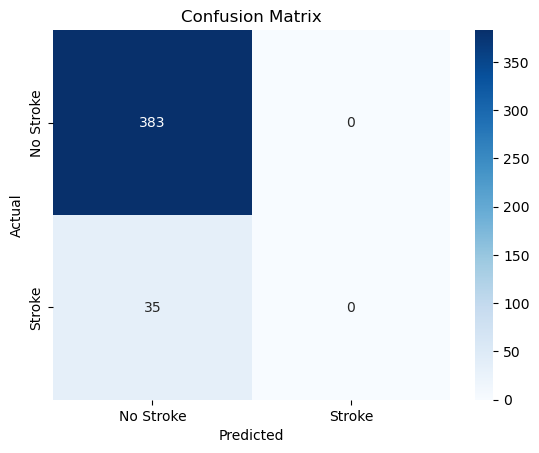

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [149]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


rf_model = RandomForestClassifier(n_estimators=100, criterion='log_loss', random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


y_pred = rf_model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[376   7]
 [ 34   1]]

Accuracy: 0.9019138755980861

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       383
           1       0.12      0.03      0.05        35

    accuracy                           0.90       418
   macro avg       0.52      0.51      0.50       418
weighted avg       0.85      0.90      0.87       418



### the results were not desired

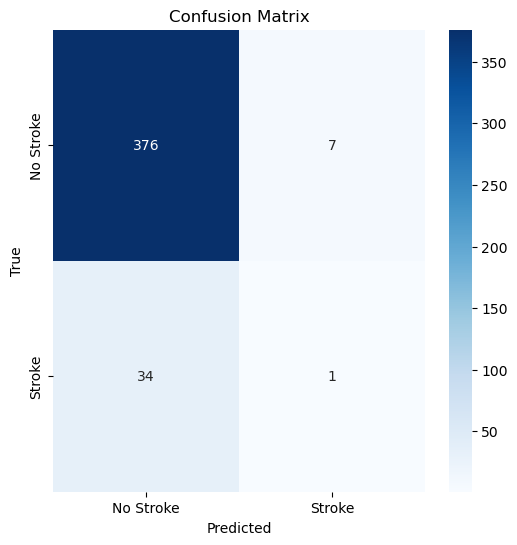

In [150]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

rf_model.fit(X_train_resampled, y_train_resampled) 


y_pred = rf_model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



In [151]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_model = SVC(kernel='rbf', C=1.0, gamma='scale') 
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.9163

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       383
           1       0.00      0.00      0.00        35

    accuracy                           0.92       418
   macro avg       0.46      0.50      0.48       418
weighted avg       0.84      0.92      0.88       418


Confusion Matrix:
 [[383   0]
 [ 35   0]]


C:\Users\faiza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\faiza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\faiza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [152]:
pip install scikit-learn imbalanced-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


### the results were not desired

Accuracy: 0.8971291866028708
Confusion Matrix:
[[374   9]
 [ 34   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       383
           1       0.10      0.03      0.04        35

    accuracy                           0.90       418
   macro avg       0.51      0.50      0.50       418
weighted avg       0.85      0.90      0.87       418



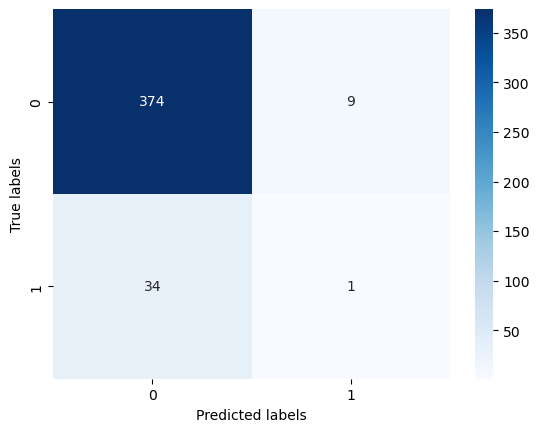

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns


X = df3.drop("stroke", axis=1)
y = df3["stroke"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


oversampler = RandomOverSampler(random_state=42)


X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    
}

rf_model = RandomForestClassifier()


grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)


best_params = grid_search.best_params_


best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train_resampled, y_train_resampled)








## Random Forest Classifier with over sampling.

### class imbalance was also managed to get better results along with over sampling


In [154]:
df3.stroke.value_counts()

0    1899
1     191
Name: stroke, dtype: int64

In [155]:
count_class_0, count_class_1 = df3.stroke.value_counts()

df_class_0 = df3[df3["stroke"] == 0]
df_class_1 = df3[df3["stroke"] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace = True)
df_over = pd.concat([df_class_0, df_class_1_over], axis = 0)
print(df_over.stroke.value_counts())

0    1899
1    1899
Name: stroke, dtype: int64


In [156]:
X_over = df_over.drop(["stroke"], axis = 1)
y_over = df_over.stroke

train_x_over, test_x_over, train_y_over, test_y_over = train_test_split(X_over, y_over, test_size = 0.2, random_state = 42)

In [157]:
oversampling_RF = RandomForestClassifier(n_estimators= 50, criterion= 'gini')
oversampling_RF.fit(train_x_over, train_y_over)
oversampling_RF.score(test_x_over, test_y_over)

0.9828947368421053

In [158]:
from sklearn.metrics import classification_report
y_pred_over = oversampling_RF.predict(test_x_over)
print(classification_report(test_y_over, y_pred_over))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       394
           1       0.97      1.00      0.98       366

    accuracy                           0.98       760
   macro avg       0.98      0.98      0.98       760
weighted avg       0.98      0.98      0.98       760



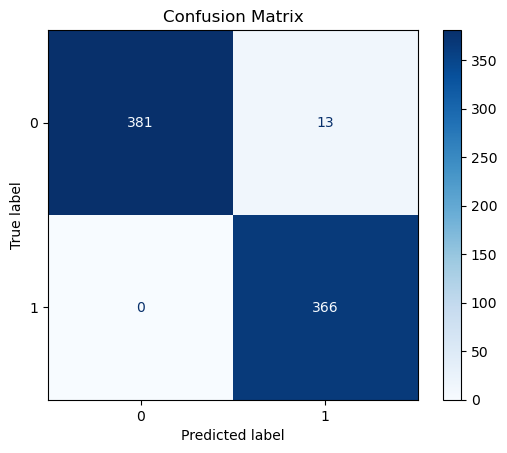

In [159]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_over = oversampling_RF.predict(test_x_over)
cm = confusion_matrix(test_y_over, y_pred_over)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix')
plt.show()




## this was best model with 98% accuracy for predicting stroke in people over the age of 50


### Conclusion:

In conclusion, this project successfully developed machine learning models for stroke prediction, achieving high accuracy through careful model selection, feature engineering, and addressing class imbalances. The exploratory data analysis (EDA) provided valuable insights into the dataset, aiding in informed decision-making throughout the project.

### Future Directions:

As we wrap up, there are several avenues for future exploration. Further refinement of models, incorporation of additional features, and exploration of advanced techniques could enhance predictive accuracy. Additionally, considering real-world implications, collaboration with healthcare professionals and domain experts could provide a deeper understanding of the factors influencing stroke risk.